In [8]:
from datetime import datetime

In [3]:
import numpy as np
import pandas as pd

<Axes: title={'center': 'Оплата больничных по месяцам'}, ylabel='К оплате по больничному'>

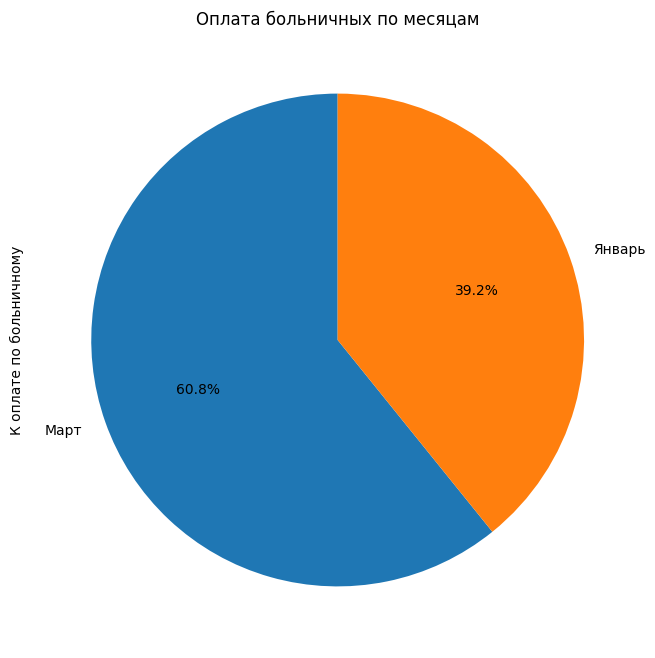

In [15]:
df = pd.read_excel('employee_data.xlsx')
df['Дата поступления'] = pd.to_datetime(df['Дата поступления'], format='%d.%m.%Y', errors='coerce')

# Вставляем столбец "Стаж" — вычисляем разницу в годах
df['Стаж'] = (datetime.now() - df['Дата поступления']).dt.days // 365

# Вставляем столбец "Дней по больничному листу"
df['Дата выдачи больничного'] = pd.to_datetime(df['Дата выдачи больничного'], errors='coerce')
df['Дата окончания больничного'] = pd.to_datetime(df['Дата окончания больничного'], format='%d.%m.%Y', errors='coerce')
df['Дней по больничному листу'] = (df['Дата окончания больничного'] - df['Дата выдачи больничного']).dt.days

# Вставляем столбец "К оплате по больничному"
def sick_leave_payment(staj, salary):
    if staj < 5:
        return salary * 0.5
    elif staj > 8:
        return salary * 1.0
    else:
        return salary * 0.8

df['К оплате по больничному'] = df.apply(lambda row: sick_leave_payment(row['Стаж'], row['Средний заработок']), axis=1)

# Вычисляем общую сумму оплаты больничных
total_sick_pay = df['К оплате по больничному'].sum()

# Вычисляем средний стаж
average_staj = df['Стаж'].mean()

# Определяем количество сотрудников со стажем больше 8 лет
count_staj_8_plus = df[df['Стаж'] > 8].shape[0]

# Находим минимальное и максимальное значения среднего заработка
min_salary = df['Средний заработок'].min()
max_salary = df['Средний заработок'].max()

# Вычисление суммы оплаты больничных по месяцам и количество дней
monthly_sick_pay = df.groupby('Месяц').agg(
    {'К оплате по больничному': 'sum', 'Дней по больничному листу': 'sum'}).reset_index()

monthly_sick_pay.to_excel("monthly_sick_pay.xlsx", index=False, engine='openpyxl')

monthly_sick_pay.set_index('Месяц')['К оплате по больничному'].plot.pie(
    autopct='%1.1f%%', figsize=(8, 8), startangle=90, legend=False, title='Оплата больничных по месяцам')

